In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

from eq_tools import *

In [2]:
radii = [1.0, 0.5] #, 0.2, 0.1] # Outer is always first
#radii = np.arange(1.0,0.05,-0.05)

velocities = [1.0, 0.7]

<IPython.core.display.Javascript object>


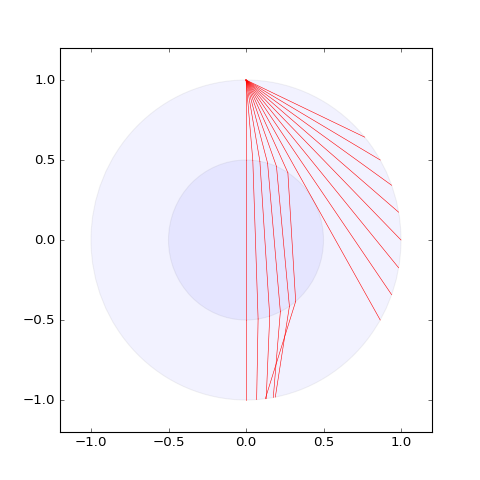

In [3]:
radii = [1.0, 0.5]
velocities = [1.0, 0.7]
rays = []
#ray = [[0.0, 1.0],[1.0, new_y(0,1,1,np.deg2rad(-85.))]]
#rays.append(ray)

origin = [0.0, 1.0]

#angles = [-87., -85., -80., -75., -70., -65,-61,-50]
angles = np.arange(-90, -20, 5)
#angles = [-80.]

for a in angles:
    x,y,angle = trace_to_radius(origin[0],origin[1], np.deg2rad(a), radii[0],radii[1], velocities[0], velocities[1])
    #print "x,y,angle",x,y,angle

    if x is not None:
        ray = [[origin[0],x],[origin[1],y]]
        rays.append(ray)

        # Uncomment this to print the radial lines
        #rays.append([[0,2*x],[0,2*y]])

        x1,y1,angle1 = trace_to_radius(x,y, angle, radii[1],radii[1],velocities[1], velocities[0])

        # Uncomment this to print the radial lines
        #rays.append([[0,2*x1],[0,2*y1]])

        ray = [[x,x1],[y,y1]]
        rays.append(ray)

        x2,y2,angle2 = trace_to_radius(x1,y1, angle1, radii[1],radii[0],velocities[1], velocities[1])

        ray = [[x1,x2],[y1,y2]]
        rays.append(ray)
    
    else:
        x,y,angle = trace_to_radius(origin[0],origin[1], np.deg2rad(a), radii[0],radii[0], velocities[0], velocities[0])
        ray = [[origin[0],x],[origin[1],y]]
        rays.append(ray)   
            
plt.figure(figsize=(6,6))
draw_earth(radii)
for ray in rays:
    plt.plot(ray[0],ray[1],'r-',linewidth=0.5,alpha=1.0)



[Cool image](http://www.earthmagazine.org/article/march-29-1936-notes-earths-inner-core)

0
0
0
0
0
0
0
0
0
0
0
0
0
0


<IPython.core.display.Javascript object>


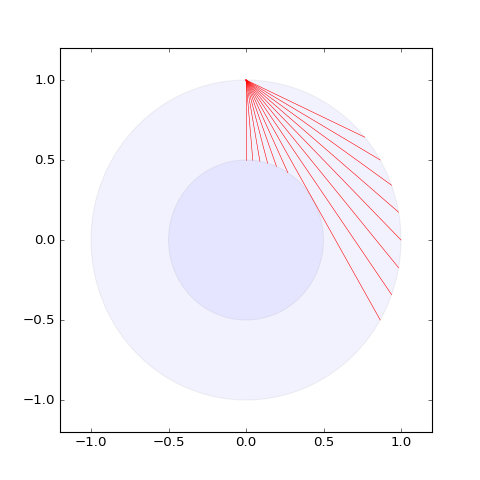

In [15]:
radii = [1.0, 0.5] #, 0.2, 0.1] # Outer is always first
#radii = np.arange(1.0,0.05,-0.05)
nradii = len(radii)

velocities = [1.0, 0.7]

origin = [0.0, 1.0]

angles = np.arange(-90, -20, 5)
#angles = [-80.]

nangles = len(angles)

rays = []

for i in range(nangles):
    
    for j in range(nradii):

        if j==0:
            x0 = origin[0]
            y0 = origin[1]

        a = angles[i]

        # Innermost layer
        if j!=nradii-1:
            x,y,angle = trace_to_radius(x0,y0, np.deg2rad(a), radii[j],radii[j+1], velocities[j], velocities[j+1])
        else:
            x,y,angle = trace_to_radius(x0,y0, np.deg2rad(a), radii[j],radii[j-1], velocities[j], velocities[j-1])

            
        if x is not None:
            ray = [[x0,x],[y0,y]]
            rays.append(ray)

        else:
            x,y,angle = trace_to_radius(x0,y0, np.deg2rad(a), radii[j],radii[j], velocities[j], velocities[j])
            ray = [[x0,x],[y0,y]]
            rays.append(ray) 
            break



'''
for a in angles:
    x,y,angle = trace_to_radius(origin[0],origin[1], np.deg2rad(a), radii[0],radii[1], velocities[0], velocities[1])
    #print "x,y,angle",x,y,angle

    if x is not None:
        ray = [[origin[0],x],[origin[1],y]]
        rays.append(ray)

        # Uncomment this to print the radial lines
        #rays.append([[0,2*x],[0,2*y]])

        x1,y1,angle1 = trace_to_radius(x,y, angle, radii[1],radii[1],velocities[1], velocities[0])

        # Uncomment this to print the radial lines
        #rays.append([[0,2*x1],[0,2*y1]])

        ray = [[x,x1],[y,y1]]
        rays.append(ray)

        x2,y2,angle2 = trace_to_radius(x1,y1, angle1, radii[1],radii[0],velocities[1], velocities[1])

        ray = [[x1,x2],[y1,y2]]
        rays.append(ray)
    
    else:
        x,y,angle = trace_to_radius(origin[0],origin[1], np.deg2rad(a), radii[0],radii[0], velocities[0], velocities[0])
        ray = [[origin[0],x],[origin[1],y]]
        rays.append(ray)   
'''


plt.figure(figsize=(6,6))
draw_earth(radii)
for ray in rays:
    plt.plot(ray[0],ray[1],'r-',linewidth=0.5,alpha=1.0)

